In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

data_dir = "../data/"

In [21]:
food_inflation_data = pd.read_csv(data_dir+'OCED_USA_FOOD_DATA.csv')
food_production = pd.read_csv(data_dir+'food production.csv')

In [22]:
print(food_inflation_data.head(2))
print(food_production.head(2))

  LOCATION INDICATOR SUBJECT MEASURE FREQUENCY     TIME     Value  Flag Codes
0      USA       CPI    FOOD  AGRWTH         M  1956-01 -1.700680         NaN
1      USA       CPI    FOOD  AGRWTH         M  1956-02 -2.372881         NaN
                       Series Name     Series Code   Country Name   
0  Cereal production (metric tons)  AG.PRD.CREL.MT  United States  \
1                              NaN             NaN            NaN   

  Country Code 1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963]   
0          USA            ..     163619978     162455780     174812487  \
1          NaN           NaN           NaN           NaN           NaN   

  1964 [YR1964] 1965 [YR1965]  ... 2013 [YR2013] 2014 [YR2014] 2015 [YR2015]   
0     160937079     183602617  ...   434308450.0   442849090.0  4.318704e+08  \
1           NaN           NaN  ...           NaN           NaN           NaN   

  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  2019 [YR2019]  2020 [YR2020]   
0  5.034661e+08

Text(0.5, 1.0, 'Food Inflation in the USA')

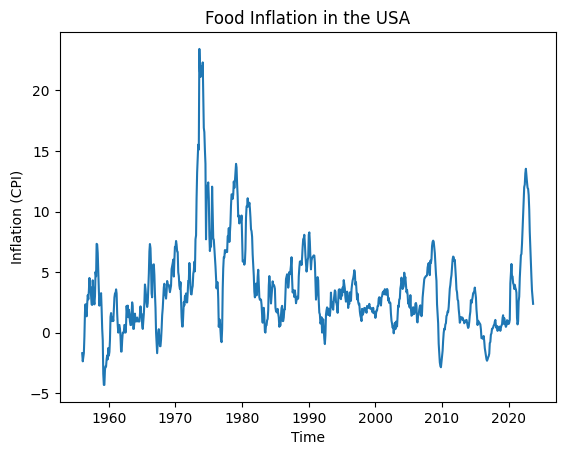

In [23]:
# plot the foof inflation data with time vs inflation
# keep only the USA data
food_inflation_data_USA = food_inflation_data[food_inflation_data['LOCATION'] == 'USA']


time = food_inflation_data_USA['TIME']
time = pd.to_datetime(time)

inflation = food_inflation_data_USA['Value']
plt.plot(time, inflation)

# add labels and title
plt.xlabel('Time')
plt.ylabel('Inflation (CPI)')

plt.title('Food Inflation in the USA')


In [24]:
# make a new dataframe with only the USA inflation data
USA_inflation_timeseries = pd.DataFrame({'Date': time, 'Inflation': inflation})
print(USA_inflation_timeseries.head(20))
# split the data to use 2023 as the test set
train_data = USA_inflation_timeseries[USA_inflation_timeseries['Date'] < '2023-01-01']
test_data = USA_inflation_timeseries[USA_inflation_timeseries['Date'] >= '2023-01-01']

         Date  Inflation
0  1956-01-01  -1.700680
1  1956-02-01  -2.372881
2  1956-03-01  -2.033898
3  1956-04-01  -1.689189
4  1956-05-01  -0.337838
5  1956-06-01   1.683502
6  1956-07-01   2.341137
7  1956-08-01   1.689189
8  1956-09-01   1.346801
9  1956-10-01   2.380952
10 1956-11-01   3.092783
11 1956-12-01   2.749141
12 1957-01-01   3.460208
13 1957-02-01   4.513889
14 1957-03-01   3.806228
15 1957-04-01   3.780069
16 1957-05-01   3.050848
17 1957-06-01   2.317881
18 1957-07-01   2.287582
19 1957-08-01   4.318937


In [25]:
# create a new sqlite database
conn = sqlite3.connect('../food_inflation_analysis.db')

In [26]:
# save the test data to  the sqlite database as a new table
test_data.to_sql('test_data', conn, if_exists='replace', index=False)

9

In [27]:
# query the database to get the test data
query = '''SELECT * FROM test_data'''
test_data_from_sql = pd.read_sql(query, conn)
print(test_data_from_sql.head(2))

                  Date  Inflation
0  2023-01-01 00:00:00   11.35728
1  2023-02-01 00:00:00   10.14978


In [28]:
# save train data to the sqlite database as a new table named OCED_USA_FOOD_INFLATION
train_data.to_sql('OCED_USA_FOOD_INFLATION', conn, if_exists='replace', index=False)

804

In [ ]:
# query the database to get the train data
query = '''SELECT * FROM OCED_USA_FOOD_INFLATION'''
train_data_from_sql = pd.read_sql(query, conn)
print(train_data_from_sql.head(2))
print(train_data_from_sql.shape)

0    1970-01-01 00:00:00.000001961
1    1970-01-01 00:00:00.000001962
2    1970-01-01 00:00:00.000001963
3    1970-01-01 00:00:00.000001964
4    1970-01-01 00:00:00.000001965
                  ...             
56   1970-01-01 00:00:00.000002017
57   1970-01-01 00:00:00.000002018
58   1970-01-01 00:00:00.000002019
59   1970-01-01 00:00:00.000002020
60   1970-01-01 00:00:00.000002021
Name: Year, Length: 61, dtype: datetime64[ns]


Text(0.5, 0, 'Year')

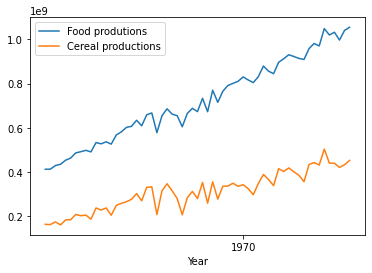

In [10]:
# Food production processing
time = food_production["Year"]
time = pd.to_datetime(time)
print(time)

Cereal_production=food_production["Cereal production (metric tons)"]

Food_produtions=food_production["Food production index (2014-2016 = 100)"]*10e6

plt.plot(time,Food_produtions,label="Food produtions")
plt.plot(time,Cereal_production,label="Cereal productions")
plt.legend()

plt.xlabel("Year")
